# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import folium


In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding

#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [3]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [4]:
y.tail()

399995     8.5
399996     9.0
399997     3.0
399998    11.5
399999     7.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [5]:
#Split Data in Test and Train Data
#Train Data befor 2015
X_train = X[X['pickup_year']<2015]
y_train = y[X_train.index]
#Test Data 2015
X_test = X[X['pickup_year']==2015]
y_test = y[X_test.index]

In [6]:
#Check if it works
X_test
#X_train
#y_train
#y_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
28,-74.010483,40.717667,-73.985771,40.660366,1,21,21,0,6,2015,...,1,0,0,0,0,1,0,0,0,0
32,-73.983330,40.738720,-73.933197,40.847225,1,11,3,0,1,2015,...,1,0,0,0,0,0,1,0,0,0
33,-73.990173,40.756447,-73.985619,40.762829,1,12,8,4,3,2015,...,1,0,0,0,0,0,1,0,0,0
65,-73.979279,40.723438,-74.004608,40.746948,6,12,10,0,4,2015,...,1,0,0,0,0,0,1,0,0,0
66,-73.954796,40.779335,-73.944931,40.780087,1,12,23,2,5,2015,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399894,-73.958290,40.800842,-73.964157,40.795120,3,25,20,3,2,2015,...,1,0,0,0,0,0,1,0,0,0
399903,-73.976318,40.751667,-73.995316,40.759514,4,18,7,3,3,2015,...,1,0,0,0,0,0,1,0,0,0
399907,-73.983368,40.726261,-73.991623,40.731087,1,24,9,2,3,2015,...,1,0,0,0,0,0,1,0,0,0
399985,-73.993896,40.732632,-73.991829,40.744473,1,1,21,5,5,2015,...,1,0,0,0,0,0,1,0,0,0


### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
%%time
#n_estimators = number of tress in the forest --> more tress the better, but longer to compute
#
regr = RandomForestRegressor(n_estimators=100 ,max_depth=None,random_state=0, n_jobs=-1)
y_pred_regr = regr.fit(X_test, y_test).predict(X_test)

#check the mean square error of the model
mean_squared_error(y_test, y_pred_regr)

Wall time: 7.47 s


3.358388457582647

Das folgende Diagramm zeigt, dass die meisten Werte in einem Bereich liegen, in dem der Fehler 10 liegt. Jedoch gibt es Ausreiser, die eine Differenz von bis zu 160 haben

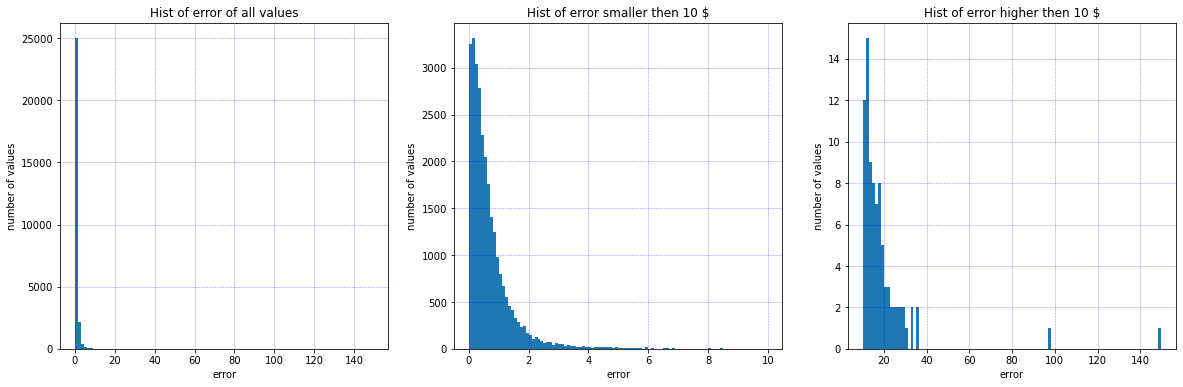

In [9]:
#compute the error
dif_error = np.abs(y_test - y_pred_regr)
dif_error_10 = dif_error[dif_error<10]
dif_error_bad = dif_error[dif_error>10]

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(20,6))

#all Values
ax0.hist(dif_error,bins=100)
ax0.set_title('Hist of error of all values')
ax0.set_ylabel('number of values')
ax0.set_xlabel('error')
ax0.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#values with max 10 error
ax1.hist(dif_error_10,bins=100)
ax1.set_title('Hist of error smaller then 10 $')
ax1.set_ylabel('number of values')
ax1.set_xlabel('error')
ax1.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#values with more then 10 error
ax2.hist(dif_error_bad,bins=100)
ax2.set_title('Hist of error higher then 10 $')
ax2.set_ylabel('number of values')
ax2.set_xlabel('error')
ax2.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.show()

Die meisten Vorraussagen haben also einen Fehler der kleiner als 4$ ist

In [10]:
print("Anzahl Vorhersagen unter 2$: ", len(dif_error[dif_error<=2]))
print("Anzahl Vorhersagen über 2$:  ", len(dif_error[dif_error>2]))

Anzahl Vorhersagen unter 2$:  26254
Anzahl Vorhersagen über 2$:   1636


In [11]:
print("Anzahl Vorhersagen unter 5$: ", len(dif_error[dif_error<=5]))
print("Anzahl Vorhersagen über 5$:  ", len(dif_error[dif_error>5]))

Anzahl Vorhersagen unter 5$:  27633
Anzahl Vorhersagen über 5$:   257
